In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv('BostonHousing.csv')
Y = data['medv']
data.drop('medv', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data,Y,test_size=0.3, random_state=0)


In [2]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#model = DecisionTreeRegressor()
#model = GradientBoostingRegressor(n_estimators=200)
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)



In [4]:
print (MSE, MAE)

15.211576560855256 2.481424342105262


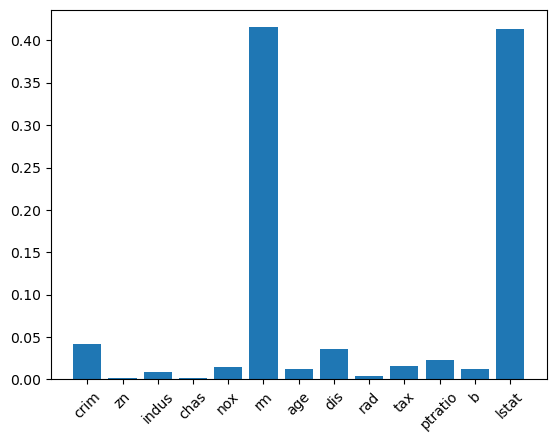

In [5]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

features = data.columns.tolist()
plt.xticks([x for x in range(len(importance))], features, rotation=45)


pyplot.show()

Text(0.5, 0, 'Actual')

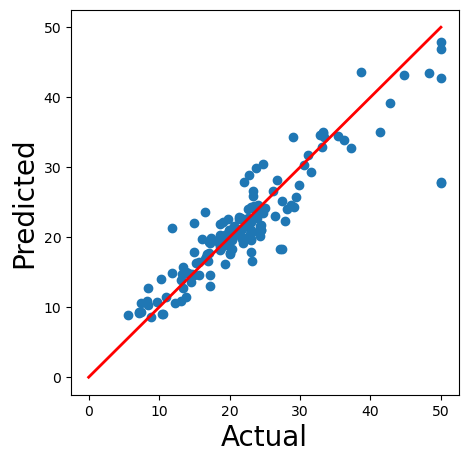

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], color="r", linestyle="-", linewidth=2)

plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)

### Maior erro

In [7]:
maxdif = 0
ind = 0
for i in range (len(y_pred)):

    if (np.abs(y_pred[i] - y_test.iloc[i]) > maxdif):
        maxdif = np.abs(y_pred[i] - y_test.iloc[i])
        ind = i
        
print (ind, y_pred[ind], y_test.iloc[ind])


37 27.69750000000001 50.0


In [8]:
import shap

shap.initjs()

# 1) Shap Values

In [9]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
np.shape(shap_values.values)

#explainer = shap.KernelExplainer(model.predict, X_test)
#shap_values = explainer.shap_values(X_test)


(152, 13)

## Waterfall plot

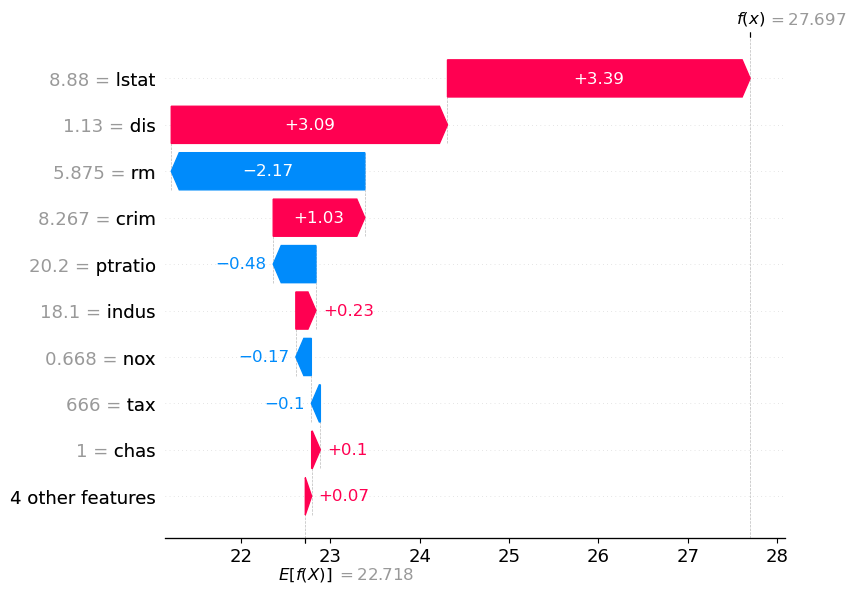

In [10]:
# plot para a primeira observação
shap.plots.waterfall(shap_values[ind])

## Force Plot

In [11]:
shap.plots.force(shap_values[ind])

## Stacked Force Plot

#### Exemplo, variável AGE: Valores maiores dessa variável tem valores menores de Shap.

In [12]:
shap.plots.force(shap_values[0:100])

## Mean Shap


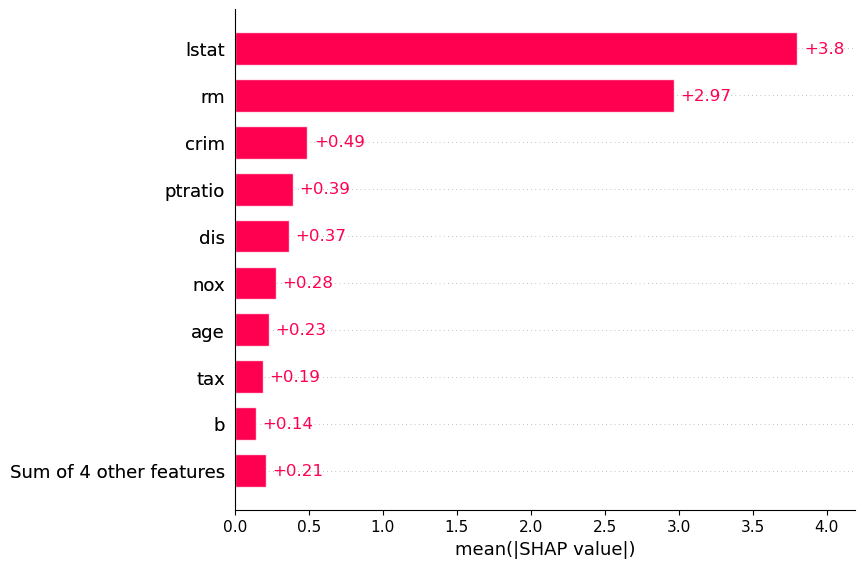

In [14]:
shap.plots.bar(shap_values)

## Beeswarm

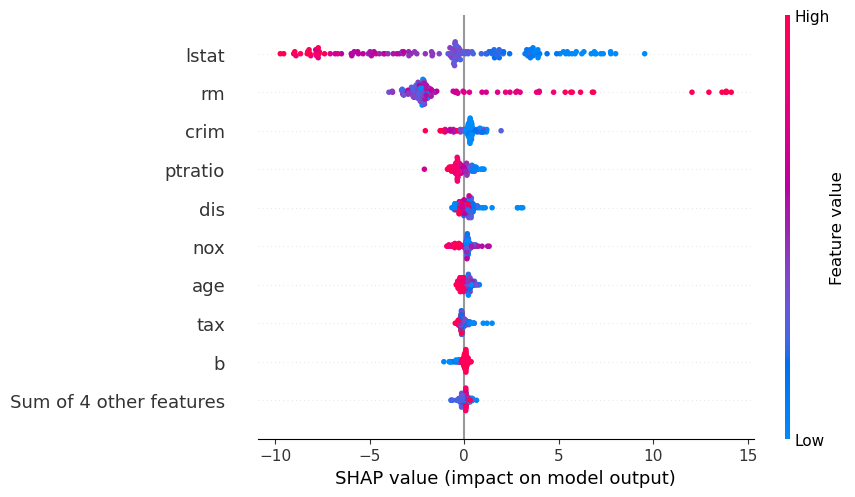

In [15]:
shap.plots.beeswarm(shap_values)


# SVM

In [17]:
import shap
from sklearn.svm import SVR

# Train your SVM (linear or non-linear)
model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print (MSE, MAE)



31.893718744795233 3.5394960672444196


In [18]:
# Create a SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_test)


Using 152 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [19]:
shap_values = explainer(X_test)


  0%|          | 0/152 [00:00<?, ?it/s]

In [20]:
np.shape(shap_values.values)


(152, 13)

Text(0.5, 0, 'Actual')

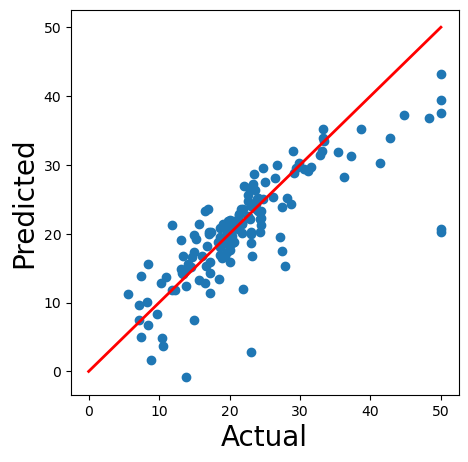

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], color="r", linestyle="-", linewidth=2)

plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)

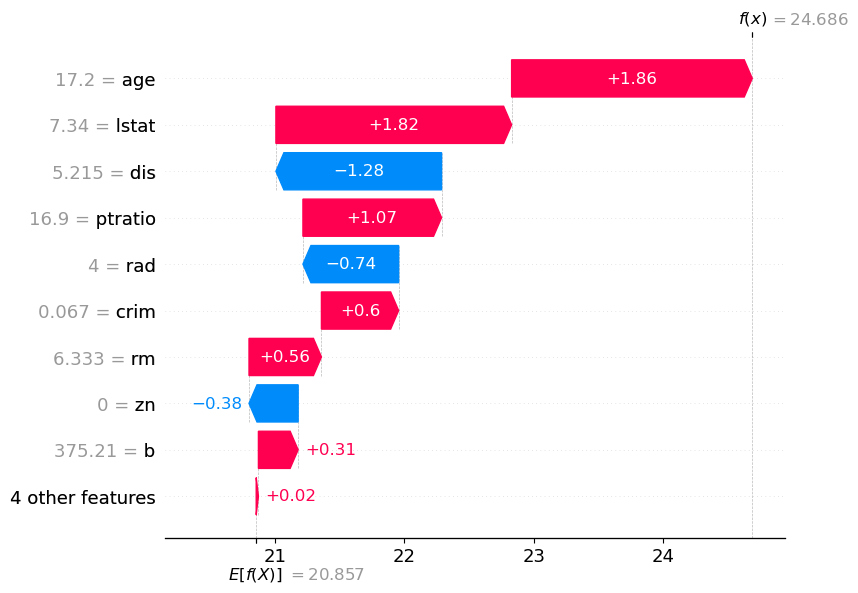

In [22]:
shap.plots.waterfall(shap_values[0])

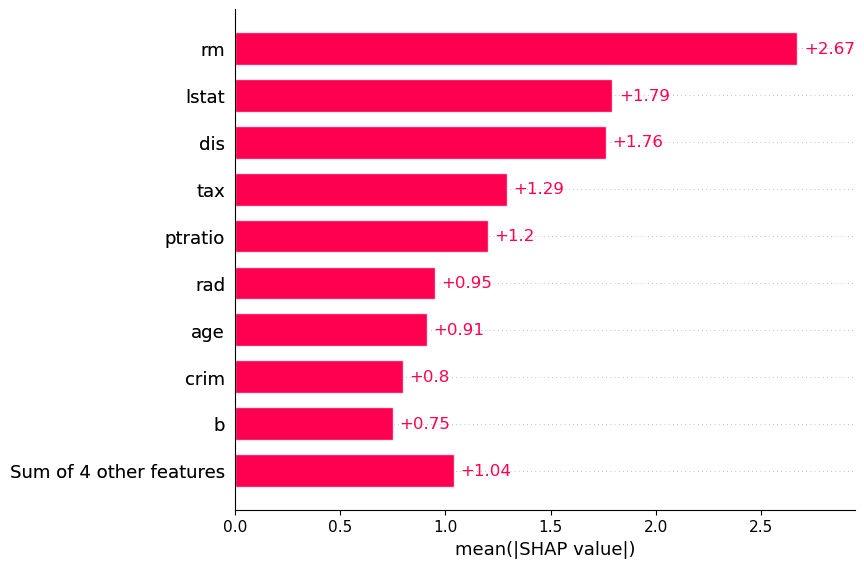

In [23]:
shap.plots.bar(shap_values)

# Lime

In [24]:
data = pd.read_csv('wine.csv')

In [25]:
# Convert the target variable to categorical labels
def quality_to_label(quality):
    return 0 if quality <= 5 else 1

data['quality'] = data['quality'].apply(quality_to_label)
distribution = data['quality'].value_counts()
print(distribution)

1    3258
0    1640
Name: quality, dtype: int64


In [26]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [27]:
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [29]:
print (score)

0.8306122448979592


In [30]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

In [31]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[0], 
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

/Users/lesoliveira/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
